# Hackaton

In [481]:
import json
import joblib
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [146]:
import fairlearn

In [147]:
df=pd.read_csv('two-years-recid.csv')#.set_index('id')
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,...,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [148]:
df.columns

Index(['id', 'name', 'sex', 'dob', 'age', 'race', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_charge_degree',
       'c_charge_desc', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'compas_screening_date', 'type_of_assessment',
       'decile_score', 'score_text', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'is_recid', 'r_case_number', 'r_offense_date',
       'r_charge_degree', 'r_charge_desc', 'is_violent_recid',
       'vr_case_number', 'vr_offense_date', 'vr_charge_degree',
       'vr_charge_desc', 'two_year_recid'],
      dtype='object')

In [149]:
### DATASET describe

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6114 non-null   int64 
 1   name                   6114 non-null   object
 2   sex                    6114 non-null   object
 3   dob                    6114 non-null   object
 4   age                    6114 non-null   int64 
 5   race                   6114 non-null   object
 6   c_jail_in              5854 non-null   object
 7   c_jail_out             5854 non-null   object
 8   c_case_number          6096 non-null   object
 9   c_offense_date         5155 non-null   object
 10  c_arrest_date          941 non-null    object
 11  c_charge_degree        6114 non-null   object
 12  c_charge_desc          6090 non-null   object
 13  juv_fel_count          6114 non-null   int64 
 14  juv_misd_count         6114 non-null   int64 
 15  juv_other_count      

In [151]:
df.describe(include='all')

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
count,6114.000000,6114,6114,6114,6114.000000,6114,5854,5854,6096,5155,...,2931,2931,2931,2882,6114.000000,694,694,694,694,6114.000000
unique,NaN,6079,2,4804,NaN,6,5854,5835,6096,888,...,2931,1033,10,313,NaN,694,512,9,75,NaN
top,NaN,anthony smith,Male,1989-04-27,NaN,African-American,2013-01-05 04:35:31,2013-09-28 02:10:00,13000208CF10A,2013-02-22,...,15043364TC20A,2015-01-28,(M1),Driving License Suspended,NaN,15010553CF10A,2015-08-15,(M1),Battery,NaN
freq,NaN,3,4937,5,NaN,3121,1,3,1,25,...,1,10,1006,217,NaN,1,6,296,286,NaN
mean,3057.500000,NaN,NaN,NaN,34.757442,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.113510,NaN,NaN,NaN,NaN,0.450114
std,1765.104105,NaN,NaN,NaN,11.802448,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.317241,NaN,NaN,NaN,NaN,0.497546
min,1.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,1529.250000,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
50%,3057.500000,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
75%,4585.750000,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000


### Convert datatypes

In [152]:
# Convert date columns to datetime
date_columns = [
    'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date', 
    'compas_screening_date', 'r_offense_date', 'vr_offense_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
    
# Convert categorical columns to 'category' dtype
categorical_columns = [
    'sex', 'race', 'c_charge_degree', 'c_charge_desc', 'type_of_assessment', 
    'score_text', 'v_type_of_assessment', 'v_score_text', 'r_charge_degree', 
    'r_charge_desc', 'vr_charge_degree', 'vr_charge_desc'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')


### Missing values

In [153]:
# Check for missing values across columns
missing_values = df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

Columns with missing values:
['c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_charge_desc', 'r_case_number', 'r_offense_date', 'r_charge_degree', 'r_charge_desc', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc']


### New offence date

In [154]:
df['new_offence_date'] = df['c_offense_date'].fillna(df['c_arrest_date'])
df.new_offence_date

0      2013-01-05
1      2013-04-02
2      2014-10-30
3      2014-01-23
4      2013-12-07
          ...    
6109   2013-08-18
6110   2013-03-23
6111   2013-09-29
6112   2013-10-30
6113   2013-01-08
Name: new_offence_date, Length: 6114, dtype: datetime64[ns]

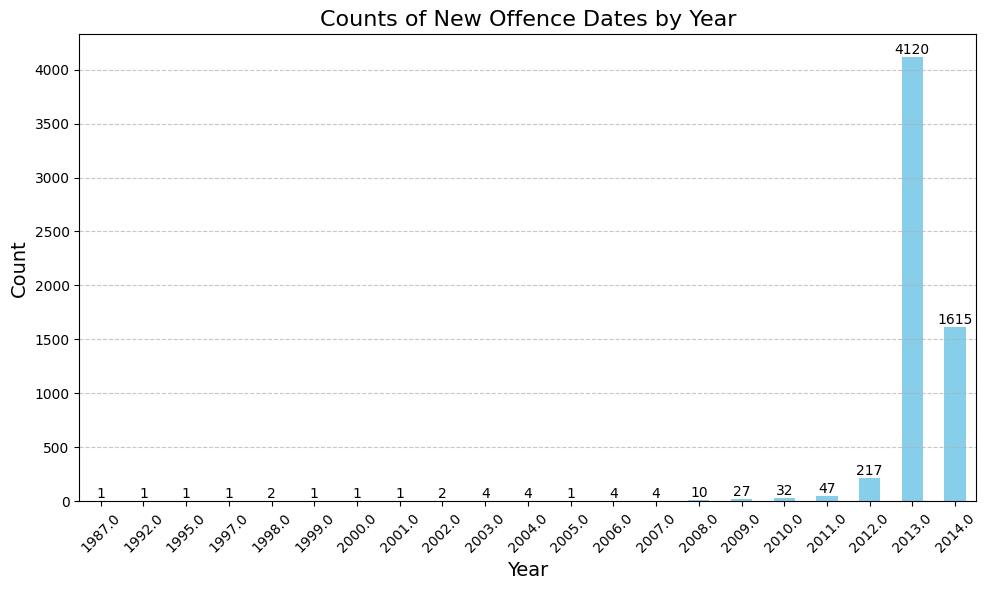

In [155]:
# Extracting year from new_offence_date
df['year'] = df['new_offence_date'].dt.year

# Counting occurrences of each year
year_counts = df['year'].value_counts().sort_index()

# Plotting the counts by year
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of New Offence Dates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(year_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [156]:
### FIlter dataset >=2012

In [157]:
# Filter dataset for new_offence_date >= 2012
df = df[df['new_offence_date'].dt.year >= 2012]
df.count()

id                       5952
name                     5952
sex                      5952
dob                      5952
age                      5952
race                     5952
c_jail_in                5776
c_jail_out               5776
c_case_number            5952
c_offense_date           5056
c_arrest_date             896
c_charge_degree          5952
c_charge_desc            5947
juv_fel_count            5952
juv_misd_count           5952
juv_other_count          5952
priors_count             5952
compas_screening_date    5952
type_of_assessment       5952
decile_score             5952
score_text               5952
v_type_of_assessment     5952
v_decile_score           5952
v_score_text             5952
is_recid                 5952
r_case_number            2882
r_offense_date           2882
r_charge_degree          2882
r_charge_desc            2833
is_violent_recid         5952
vr_case_number            681
vr_offense_date           681
vr_charge_degree          681
vr_charge_

In [158]:
filtered_df = df[['name', 'sex', 'age', 'race', 'c_jail_in','c_jail_out','c_offense_date', 'c_arrest_date']]
filtered_df['test']=(df.c_jail_in - df.c_offense_date).dt.days
filtered_df['test'].value_counts()


/tmp/ipykernel_3337/2483496406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['test']=(df.c_jail_in - df.c_offense_date).dt.days


test
 0.0      4053
 1.0       623
-1.0        11
 2.0         7
 59.0        3
          ... 
 628.0       1
 343.0       1
-39.0        1
 318.0       1
 606.0       1
Name: count, Length: 201, dtype: int64

In [159]:
filtered_df['test']=(df.c_jail_in - df.c_arrest_date).dt.days
filtered_df['test'].value_counts()

/tmp/ipykernel_3337/2166243016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['test']=(df.c_jail_in - df.c_arrest_date).dt.days


test
 0.0      624
-1.0       47
 1.0       33
-17.0       3
-3.0        2
         ... 
 90.0       1
 361.0      1
 81.0       1
 243.0      1
 825.0      1
Name: count, Length: 129, dtype: int64

### Dob vs age

In [160]:
df['dob'] = pd.to_datetime(df['dob'])

current_date = pd.to_datetime('today')
df['age_2'] = (pd.to_datetime('today') - df['dob']).dt.days // 365
df

/tmp/ipykernel_3337/2735553813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dob'] = pd.to_datetime(df['dob'])
/tmp/ipykernel_3337/2735553813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_2'] = (pd.to_datetime('today') - df['dob']).dt.days // 365


,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-01-05,2013.0,71
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-04-02,2013.0,36
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,Driving License Suspended,0,NaN,NaT,NaN,NaN,1,2014-10-30,2014.0,65
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaT,...,Possess Cannabis/20 Grams Or Less,0,NaN,NaT,NaN,NaN,1,2014-01-23,2014.0,27
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-12-07,2013.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-08-18,2013.0,37
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-23,2013.0,38
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-09-29,2013.0,41
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-10-30,2013.0,36


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# Calculate correlation coefficient
correlation, _ = pearsonr(df['age'], df['age_2'])
print(f'Correlation coefficient: {correlation:.2f}')



ModuleNotFoundError: No module named 'seaborn'

### Race

In [162]:
df['race'].value_counts()

race
African-American    3017
Caucasian           2051
Hispanic             525
Other                321
Asian                 26
Native American       12
Name: count, dtype: int64

### Sex

In [163]:
df['sex'].value_counts()

sex
Male      4802
Female    1150
Name: count, dtype: int64

### Scores vs Text

In [164]:
distinct_values = df[['decile_score', 'score_text']].value_counts()
distinct_values

decile_score  score_text
1             Low           1196
2             Low            787
4             Low            648
3             Low            626
5             Medium         568
6             Medium         524
7             Medium         481
8             High           403
9             High           396
10            High           323
Name: count, dtype: int64

In [165]:
distinct_values = df[['r_charge_degree', 'r_charge_desc']].value_counts()
distinct_values
#.loc[df['r_charge_degree'] == '(M1)']

r_charge_degree  r_charge_desc                    
(M1)             Possess Cannabis/20 Grams Or Less    214
(M2)             Driving License Suspended            214
(M1)             Resist/Obstruct W/O Violence         163
                 Battery                              156
(M2)             Operating W/O Valid License          146
                                                     ... 
(F3)             Att Burgl Struc/Conv Dwel/Occp         1
                 Aggravated Assault W/dead Weap         1
                 Agg Assault W/int Com Fel Dome         1
(F2)             Wear Mask w/Commit Offense             1
(CO3)            Drink/Premises Licensed Estab          1
Name: count, Length: 324, dtype: int64

In [166]:
distinct_values = df[['vr_charge_degree', 'vr_charge_desc']].value_counts()
distinct_values

vr_charge_degree  vr_charge_desc                
(M1)              Battery                           281
(F3)              Felony Battery (Dom Strang)        32
                  Battery on Law Enforc Officer      29
                  Aggravated Assault W/Dead Weap     27
(F2)              Aggrav Battery w/Deadly Weapon     27
                                                   ... 
(F3)              D.U.I. Serious Bodily Injury        1
(F2)              Arson II (Vehicle)                  1
                  Armed False Imprisonment            1
                  Threaten Throw Destruct Device      1
(F1)              Sex Batt Faml/Cust Vict 12-17Y      1
Name: count, Length: 82, dtype: int64

### Convert to date

In [167]:
date_columns = ['dob','c_jail_in', 'c_jail_out', 'c_offense_date', 'c_arrest_date','r_offense_date','vr_offense_date']  
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df

/tmp/ipykernel_3337/2706481064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_columns] = df[date_columns].apply(pd.to_datetime)


,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-01-05,2013.0,71
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-04-02,2013.0,36
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,Driving License Suspended,0,NaN,NaT,NaN,NaN,1,2014-10-30,2014.0,65
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaT,...,Possess Cannabis/20 Grams Or Less,0,NaN,NaT,NaN,NaN,1,2014-01-23,2014.0,27
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-12-07,2013.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-08-18,2013.0,37
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-23,2013.0,38
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-09-29,2013.0,41
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-10-30,2013.0,36


### offence vs arrest date

In [168]:
distinct_values = df[['c_offense_date', 'c_arrest_date']]#.value_counts()
distinct_values

,c_offense_date,c_arrest_date
0,2013-01-05,NaT
1,2013-04-02,NaT
2,2014-10-30,NaT
3,NaT,2014-01-23
4,2013-12-07,NaT
...,...,...
6109,2013-08-18,NaT
6110,2013-03-23,NaT
6111,2013-09-29,NaT
6112,NaT,2013-10-30


### Check duplicates for name

In [169]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
duplicates_mask = df.duplicated(subset=['name'], keep=False)

# Filter the DataFrame to show the duplicate rows
duplicate_rows = df[duplicates_mask].sort_values(by='name')
duplicate_rows

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2
6001,6002,angel santiago,Male,1983-07-28,32,African-American,2013-09-16 06:50:38,2013-09-17 07:08:30,13013071CF10A,2013-09-16,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-09-16,2013.0,40
4729,4730,angel santiago,Male,1978-04-27,37,Caucasian,2013-05-25 05:53:02,2013-05-26 08:34:47,13010080MM10A,2013-05-25,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-05-25,2013.0,46
4226,4227,anthony gonzalez,Male,1985-03-04,31,Hispanic,2013-05-23 07:29:12,2013-08-12 07:13:27,13007366CF10A,2013-05-23,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-05-23,2013.0,39
4039,4040,anthony gonzalez,Male,1982-08-26,33,Caucasian,2013-03-18 04:53:59,2013-03-18 06:31:57,13005336MM10A,2013-03-18,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-18,2013.0,41
575,576,anthony louis,Male,1985-07-19,30,African-American,2013-03-19 01:34:13,2013-03-23 12:51:55,13005335MM10A,2013-03-18,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-18,2013.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,2093,ronald shelton,Male,1958-06-02,57,African-American,2013-05-28 08:29:39,2013-07-18 03:49:07,13007619CF10A,2013-05-28,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-05-28,2013.0,66
4539,4540,william shaw,Male,1959-12-26,56,African-American,2013-03-22 03:23:49,2013-05-21 11:03:28,13004184CF10A,2013-03-22,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-22,2013.0,64
3972,3973,william shaw,Male,1968-05-17,47,Caucasian,2013-08-14 05:45:53,2013-08-14 09:05:13,13015381MM10A,2013-08-14,...,Aggrav Battery w/Deadly Weapon,1,13015080CF10A,2013-10-29,(F2),Aggrav Battery w/Deadly Weapon,1,2013-08-14,2013.0,56
1792,1793,xavier johnson,Male,1994-10-01,21,African-American,2013-01-18 07:32:20,2013-01-22 05:57:43,13000879CF10A,2013-01-18,...,Fail Register Vehicle,0,NaN,NaT,NaN,NaN,1,2013-01-18,2013.0,29


### Deleting columns

In [170]:
#cols_to_drop = ['name', 'dob', 'c_case_number','r_case_number','vr_case_number', 'r_charge_desc', 'vr_charge_desc', 'v_score_text', 'type_of_assessment', 'v_type_of_assessment', 'score_text', 'age_2']

df_removed=df.copy()
#df_removed = df_removed.drop(columns=cols_to_drop)
#df_removed#.columns

### Deleting non sense rows

In [171]:
df_removed=df_removed[~((df_removed['c_jail_in'] > df_removed['c_jail_out']) 
                         # | (df_removed['c_jail_in'] > df_removed['c_offense_date']) 
                         # | (df_removed['c_jail_in'] > df_removed['c_arrest_date'])
                         )
                       ]
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-01-05,2013.0,71
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-04-02,2013.0,36
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-12-07,2013.0,46
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,Poss F/Arm Delinq,0,NaN,NaT,NaN,NaN,1,2013-11-11,2013.0,31
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-25,2013.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-08-18,2013.0,37
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-03-23,2013.0,38
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-09-29,2013.0,41
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,0,NaN,NaT,NaN,NaN,0,2013-10-30,2013.0,36


In [172]:
df.juv_fel_count.value_counts()

juv_fel_count
0     5726
1      152
2       42
3       15
4        9
5        4
6        2
9        1
10       1
Name: count, dtype: int64

In [173]:
df.juv_misd_count.value_counts()

juv_misd_count
0     5612
1      237
2       62
3       23
4        7
5        4
6        3
8        2
13       1
12       1
Name: count, dtype: int64

### Balanced

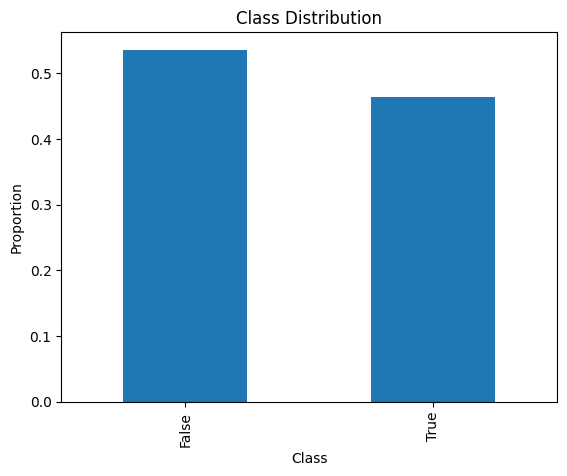

In [492]:
# Assuming 'target_column' is the name of the target variable column in your DataFrame
class_balance = df_removed['two_y_recid'].value_counts(normalize=True)
class_balance.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

/tmp/ipykernel_3337/647752559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('race')['two_year_recid'].mean().plot(kind='bar')


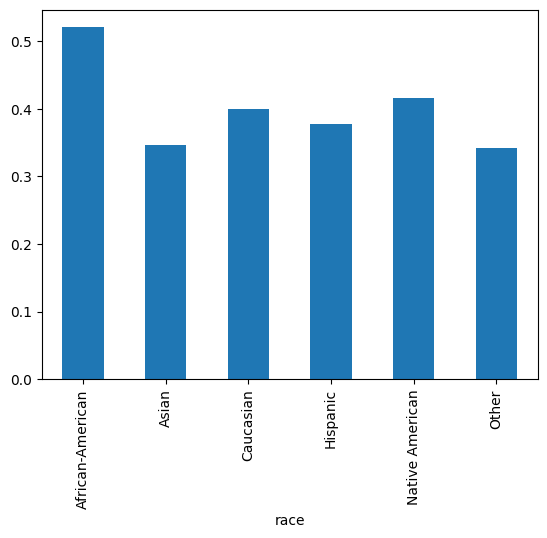

In [175]:

df.groupby('race')['two_year_recid'].mean().plot(kind='bar')
plt.show()

/tmp/ipykernel_3337/681357320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['two_year_recid'].mean().plot(kind='bar')


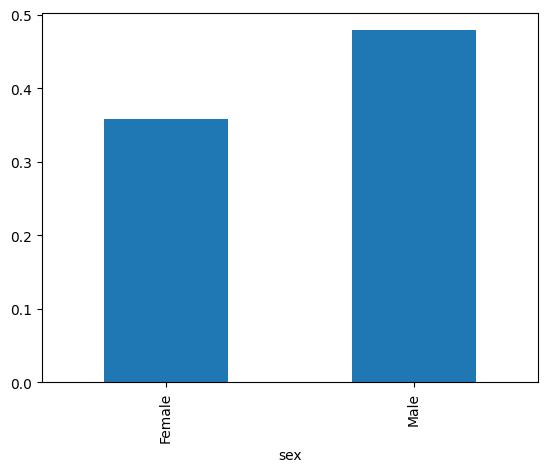

In [176]:
df.groupby('sex')['two_year_recid'].mean().plot(kind='bar')
plt.show()

In [177]:
def categorize_charge(charge):
    if pd.isnull(charge):
        return 'Unknown'
    elif charge == 'False Imprisonment':
        return 'False Imprisonment'
    elif charge == 'arrest case no charge':
        return 'No Charge'
    elif 'battery' in charge.lower() or 'assault' in charge.lower() or 'abuse' in charge.lower():
        return 'Violent Crimes'
    elif 'theft' in charge.lower() or 'burglary' in charge.lower() or 'robbery' in charge.lower():
        return 'Theft'
    elif 'dui' in charge.lower() or 'driving' in charge.lower() or 'license' in charge.lower():
        return 'Driving Offenses'
    elif 'possession' in charge.lower() or 'cocaine' in charge.lower() or 'methamphetamine' in charge.lower() or 'cannabis' in charge.lower():
        return 'Drug-related Crimes'
    elif 'sex' in charge.lower() or 'prostitution' in charge.lower() or 'lewd' in charge.lower():
        return 'Sex-related Crimes'
    else:
        return 'Other Crimes'

df['charge_category'] = df['c_charge_desc'].apply(categorize_charge)

df[['c_charge_desc','charge_category']]

/tmp/ipykernel_3337/1001703636.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charge_category'] = df['c_charge_desc'].apply(categorize_charge)


,c_charge_desc,charge_category
0,False Imprisonment,False Imprisonment
1,Battery,Violent Crimes
2,DUI Level 0.15 Or Minor In Veh,Driving Offenses
3,arrest case no charge,No Charge
4,Battery,Violent Crimes
...,...,...
6109,Battery,Violent Crimes
6110,Possess Cannabis/20 Grams Or Less,Drug-related Crimes
6111,Felony Driving While Lic Suspd,Driving Offenses
6112,arrest case no charge,No Charge


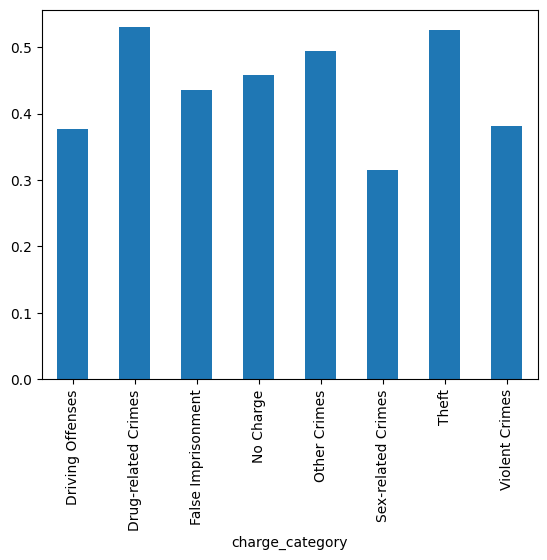

In [178]:
df.groupby('charge_category')['two_year_recid'].mean().plot(kind='bar')
plt.show()

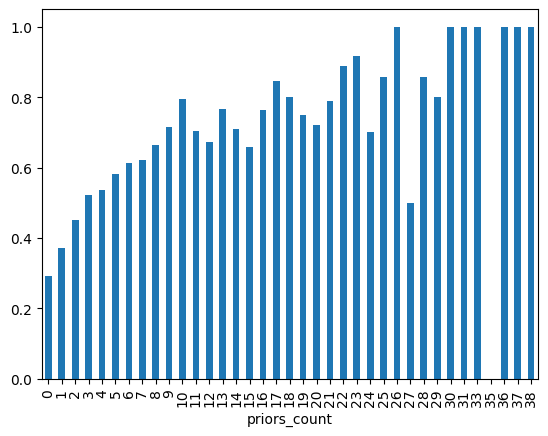

In [179]:
df.groupby('priors_count')['two_year_recid'].mean().plot(kind='bar')
plt.show()

### Correlation

In [180]:
# Select numeric columns
numeric_columns = df[['age',
                      'juv_fel_count',
                      'juv_misd_count',
                      'juv_other_count',
                      'decile_score', 
                      'v_decile_score', 
                      'is_recid', 
                      'is_violent_recid',
                      'priors_count', 
                      'two_year_recid']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

In [181]:
df.r_charge_desc.value_counts(dropna=False)
#df.r_charge_degree.count()

r_charge_desc
NaN                                  3119
Driving License Suspended             214
Possess Cannabis/20 Grams Or Less     214
Resist/Obstruct W/O Violence          163
Battery                               156
                                     ... 
Depriv LEO of Protect/Communic          1
Deliver Cocaine 1000FT School           1
Possess w/I/Utter Forged Bills          1
Agg Assault W/int Com Fel Dome          1
False Motor Veh Insurance Card          0
Name: count, Length: 314, dtype: int64

In [182]:
df.vr_charge_degree.value_counts(dropna=False)

vr_charge_degree
NaN      5271
(M1)      292
(F3)      183
(F2)      136
(F1)       32
(F7)       15
(M2)       14
(F6)        4
(MO3)       4
(F5)        1
Name: count, dtype: int64

In [183]:
crosstab_result = pd.crosstab(df['r_charge_degree'], df['vr_charge_degree'], dropna=False, margins=True)
crosstab_result

vr_charge_degree,(F1),(F2),(F3),(F5),(F6),(F7),(M1),(M2),(MO3),All
r_charge_degree,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,NaN
(CO3),0,0,0,0,0,0,0,0,0,1.0
(F1),11,2,3,0,0,1,1,0,0,40.0
(F2),2,67,4,0,0,1,5,0,1,140.0
(F3),6,17,105,0,0,1,32,1,0,735.0
(F5),0,0,0,1,0,0,0,0,0,1.0
(F6),0,0,0,0,3,0,0,0,0,3.0
(F7),0,0,1,0,0,5,0,0,0,6.0
(M1),6,27,48,0,0,6,204,7,0,990.0


In [184]:
groupby_result = df.groupby(['c_charge_degree', 'r_charge_degree']).size().reset_index(name='count')
groupby_result

/tmp/ipykernel_3337/2708953495.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_result = df.groupby(['c_charge_degree', 'r_charge_degree']).size().reset_index(name='count')


,c_charge_degree,r_charge_degree,count
0,F,(CO3),0
1,F,(F1),31
2,F,(F2),100
3,F,(F3),580
4,F,(F5),1
5,F,(F6),3
6,F,(F7),6
7,F,(M1),662
8,F,(M2),621
9,F,(MO3),18


In [185]:
df.r_charge_degree.value_counts(dropna=False)

r_charge_degree
NaN      3070
(M1)      990
(M2)      933
(F3)      735
(F2)      140
(F1)       40
(MO3)      33
(F7)        6
(F6)        3
(CO3)       1
(F5)        1
Name: count, dtype: int64

In [186]:
df.r_charge_desc.value_counts(dropna=False)

r_charge_desc
NaN                                  3119
Driving License Suspended             214
Possess Cannabis/20 Grams Or Less     214
Resist/Obstruct W/O Violence          163
Battery                               156
                                     ... 
Depriv LEO of Protect/Communic          1
Deliver Cocaine 1000FT School           1
Possess w/I/Utter Forged Bills          1
Agg Assault W/int Com Fel Dome          1
False Motor Veh Insurance Card          0
Name: count, Length: 314, dtype: int64

In [187]:
df.new_offence_date

0      2013-01-05
1      2013-04-02
2      2014-10-30
3      2014-01-23
4      2013-12-07
          ...    
6109   2013-08-18
6110   2013-03-23
6111   2013-09-29
6112   2013-10-30
6113   2013-01-08
Name: new_offence_date, Length: 5952, dtype: datetime64[ns]

### Temporal Analysis

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data loading
# df = pd.read_csv('your_data.csv')  # Uncomment and modify to load your data

# Drop missing values from the 'two_year_recid' column
df = df.dropna(subset=['is_recid'])

# Convert date columns to datetime
date_columns = ['c_jail_in', 'c_jail_out', 'new_offence_date', 
                'compas_screening_date', 'r_offense_date', 'vr_offense_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Ensure the target column is time series data
df.set_index('new_offence_date', inplace=True)

# Resample the data and calculate the mean, then drop missing values
resampled_data = df['is_recid'].resample('D').mean().dropna()

# Perform seasonal decomposition
result = seasonal_decompose(resampled_data, model='additive', period=365)  # Adjust period for your data frequency

# Plot decomposition
result.plot()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [189]:
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2,charge_category
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,0,NaN,NaT,NaN,NaN,0,2013-01-05,2013.0,71,False Imprisonment
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,0,NaN,NaT,NaN,NaN,0,2013-04-02,2013.0,36,Violent Crimes
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,0,NaN,NaT,NaN,NaN,1,2014-10-30,2014.0,65,Driving Offenses
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaT,...,0,NaN,NaT,NaN,NaN,1,2014-01-23,2014.0,27,No Charge
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,0,NaN,NaT,NaN,NaN,0,2013-12-07,2013.0,46,Violent Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,0,NaN,NaT,NaN,NaN,0,2013-08-18,2013.0,37,Violent Crimes
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,0,NaN,NaT,NaN,NaN,0,2013-03-23,2013.0,38,Drug-related Crimes
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,0,NaN,NaT,NaN,NaN,0,2013-09-29,2013.0,41,Driving Offenses
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,0,NaN,NaT,NaN,NaN,0,2013-10-30,2013.0,36,No Charge


### Feature Engineering

In [488]:
df_removed = df_removed.dropna(subset=['c_jail_out'])

# Convert columns to datetime
df_removed['c_jail_out'] = pd.to_datetime(df_removed['c_jail_out'])
df_removed['r_offense_date'] = pd.to_datetime(df_removed['r_offense_date'])

# Calculate the difference in years
df_removed['time_diff'] = (df_removed['r_offense_date'] - df_removed['c_jail_out']).dt.days
df_removed['two_y_recid'] = df_removed['time_diff'] <= (365 * 2)

In [489]:
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,age_group,new_offence_date_year,new_offence_date_month,new_offence_date_day,new_offence_date_dayofweek,new_offence_date_is_weekend,charge_category,season_of_offense,time_diff,two_y_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,56-65,2013,1,5,5,True,False Imprisonment,Winter,NaN,False
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,26-35,2013,4,2,1,False,Violent Crimes,Spring,NaN,False
2,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,36-45,2013,12,7,5,True,Violent Crimes,Winter,NaN,False
3,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,19-25,2013,11,11,0,False,Other Crimes,Fall,72.0,True
4,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,26-35,2013,3,25,0,False,Drug-related Crimes,Spring,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,26-35,2013,8,18,6,True,Violent Crimes,Summer,NaN,False
5777,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,26-35,2013,3,23,5,True,Drug-related Crimes,Spring,NaN,False
5778,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,26-35,2013,9,29,6,True,Driving Offenses,Fall,NaN,False
5779,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,26-35,2013,10,30,2,False,No Charge,Fall,NaN,False


In [190]:
#prior juvenile crimes
df_removed['juv_crimes'] = (df_removed['juv_fel_count'] + df_removed['juv_misd_count'] + df_removed['juv_other_count'])

#prior not-juvenile crimes
df_removed['adult_crimes'] = (df_removed['priors_count'] - df_removed['juv_crimes'])

In [191]:
### jail_time_days
# Example of time in jail
df_removed['jail_time_days'] = (df_removed['c_jail_out'] - df_removed['c_jail_in']).dt.days

# Identify null values in jail_time_days
null_count = df_removed['jail_time_days'].isnull().sum()
null_count
# Filter out rows where jail_time_days is negative
#df_removed = df_removed[df_removed['jail_time_days'] >= 0]
#df_removed
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,new_offence_date,year,age_2,juv_crimes,adult_crimes,jail_time_days
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaT,NaN,NaN,0,2013-01-05,2013.0,71,0,0,1.0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaT,NaN,NaN,0,2013-04-02,2013.0,36,0,1,1.0
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaT,NaN,NaN,0,2013-12-07,2013.0,46,0,0,1.0
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,NaT,NaN,NaN,1,2013-11-11,2013.0,31,0,4,0.0
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,NaT,NaN,NaN,0,2013-03-25,2013.0,34,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaT,NaN,NaN,0,2013-08-18,2013.0,37,0,1,1.0
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaT,NaN,NaN,0,2013-03-23,2013.0,38,0,4,5.0
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaT,NaN,NaN,0,2013-09-29,2013.0,41,0,0,1.0
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaT,NaN,NaN,0,2013-10-30,2013.0,36,0,3,37.0


In [192]:
### new_offence_date
df_removed['new_offence_date'] = df_removed['c_offense_date'].fillna(df_removed['c_arrest_date'])

In [193]:
# Create a recidivism history feature
df_removed['has_prior_recidivism'] = df_removed['priors_count'] > 0

In [194]:
# Create age groups
df_removed['age_group'] = pd.cut(df_removed['age'], bins=[0, 18, 25, 35, 45, 55, 65, np.inf], labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+'])
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,vr_charge_desc,two_year_recid,new_offence_date,year,age_2,juv_crimes,adult_crimes,jail_time_days,has_prior_recidivism,age_group
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,0,2013-01-05,2013.0,71,0,0,1.0,False,56-65
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,0,2013-04-02,2013.0,36,0,1,1.0,True,26-35
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,0,2013-12-07,2013.0,46,0,0,1.0,False,36-45
5,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,NaN,1,2013-11-11,2013.0,31,0,4,0.0,True,19-25
6,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,NaN,0,2013-03-25,2013.0,34,0,2,0.0,True,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,0,2013-08-18,2013.0,37,0,1,1.0,True,26-35
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,0,2013-03-23,2013.0,38,0,4,5.0,True,26-35
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,0,2013-09-29,2013.0,41,0,0,1.0,False,26-35
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,NaN,0,2013-10-30,2013.0,36,0,3,37.0,True,26-35


In [195]:
# Extract date features
date_columns=['new_offence_date']
for col in date_columns:
    if col in df_removed.columns:
        df_removed[col + '_year'] = df_removed[col].dt.year
        df_removed[col + '_month'] = df_removed[col].dt.month
        df_removed[col + '_day'] = df_removed[col].dt.day
        df_removed[col + '_dayofweek'] = df_removed[col].dt.dayofweek
        df_removed[col + '_is_weekend'] = df_removed[col].dt.dayofweek >= 5
        
        df_removed['new_offence_date_is_weekend'] = df_removed['new_offence_date_is_weekend'].astype(str) 
        
df_removed.dtypes

id                                      int64
name                                   object
sex                                  category
dob                            datetime64[ns]
age                                     int64
race                                 category
c_jail_in                      datetime64[ns]
c_jail_out                     datetime64[ns]
c_case_number                          object
c_offense_date                 datetime64[ns]
c_arrest_date                  datetime64[ns]
c_charge_degree                      category
c_charge_desc                        category
juv_fel_count                           int64
juv_misd_count                          int64
juv_other_count                         int64
priors_count                            int64
compas_screening_date          datetime64[ns]
type_of_assessment                   category
decile_score                            int64
score_text                           category
v_type_of_assessment              

In [196]:
df_removed.c_charge_desc.unique()

['False Imprisonment', 'Battery', 'Poss Cntrft Contr Sub w/Intent', 'Possession Of Methamphetamine', 'arrest case no charge', ..., 'Possess Mot Veh W/Alt Vin #', 'Conspiracy to Deliver Cocaine', 'Sell Conterfeit Cont Substance', 'Offer Agree Secure For Lewd Act', 'Prostitution/Lewdness/Assign']
Length: 385
Categories (408, object): ['Abuse Without Great Harm', 'Accessory After the Fact', 'Agg Abuse Elderlly/Disabled Adult', 'Agg Assault Law Enforc Officer', ..., 'Violation Of Boater Safety Id', 'Violation of Injunction Order/Stalking/Cybers..., 'Voyeurism', 'arrest case no charge']

In [197]:
df_removed.reset_index(drop=True, inplace=True)

In [198]:
def categorize_charge(charge):
    if pd.isnull(charge):
        return 'Unknown'
    elif charge == 'False Imprisonment':
        return 'False Imprisonment'
    elif charge == 'arrest case no charge':
        return 'No Charge'
    elif 'battery' in charge.lower() or 'assault' in charge.lower() or 'abuse' in charge.lower():
        return 'Violent Crimes'
    elif 'theft' in charge.lower() or 'burglary' in charge.lower() or 'robbery' in charge.lower():
        return 'Theft'
    elif 'dui' in charge.lower() or 'driving' in charge.lower() or 'license' in charge.lower():
        return 'Driving Offenses'
    elif 'possession' in charge.lower() or 'cocaine' in charge.lower() or 'methamphetamine' in charge.lower() or 'cannabis' in charge.lower():
        return 'Drug-related Crimes'
    elif 'sex' in charge.lower() or 'prostitution' in charge.lower() or 'lewd' in charge.lower():
        return 'Sex-related Crimes'
    else:
        return 'Other Crimes'

df_removed['charge_category'] = df_removed['c_charge_desc'].apply(categorize_charge)
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,adult_crimes,jail_time_days,has_prior_recidivism,age_group,new_offence_date_year,new_offence_date_month,new_offence_date_day,new_offence_date_dayofweek,new_offence_date_is_weekend,charge_category
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,0,1.0,False,56-65,2013,1,5,5,True,False Imprisonment
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,1,1.0,True,26-35,2013,4,2,1,False,Violent Crimes
2,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,0,1.0,False,36-45,2013,12,7,5,True,Violent Crimes
3,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,4,0.0,True,19-25,2013,11,11,0,False,Other Crimes
4,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,2,0.0,True,26-35,2013,3,25,0,False,Drug-related Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,1,1.0,True,26-35,2013,8,18,6,True,Violent Crimes
5777,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,4,5.0,True,26-35,2013,3,23,5,True,Drug-related Crimes
5778,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,0,1.0,False,26-35,2013,9,29,6,True,Driving Offenses
5779,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,3,37.0,True,26-35,2013,10,30,2,False,No Charge


In [199]:
# Time Since Last Recidivism
#df_removed['time_since_last_recidivism'] = pd.to_datetime(df_removed['new_offence_date']) - pd.to_datetime(df_removed['vr_offense_date'])
#df_removed['time_since_last_recidivism'] = df_removed['time_since_last_recidivism'].dt.days
#df_removed

In [200]:
# Season of Offense
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_removed['season_of_offense'] = pd.to_datetime(df_removed['c_offense_date']).dt.month.apply(get_season)
df_removed

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,jail_time_days,has_prior_recidivism,age_group,new_offence_date_year,new_offence_date_month,new_offence_date_day,new_offence_date_dayofweek,new_offence_date_is_weekend,charge_category,season_of_offense
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,1.0,False,56-65,2013,1,5,5,True,False Imprisonment,Winter
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,1.0,True,26-35,2013,4,2,1,False,Violent Crimes,Spring
2,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,1.0,False,36-45,2013,12,7,5,True,Violent Crimes,Winter
3,6,david corbin,Male,1993-02-18,23,African-American,2013-11-11 08:40:03,2013-11-12 01:22:51,13015689CF10A,2013-11-11,...,0.0,True,19-25,2013,11,11,0,False,Other Crimes,Fall
4,7,joseph brock,Male,1989-10-20,26,Caucasian,2013-03-25 11:41:47,2013-03-26 01:03:38,13004331CF10A,2013-03-25,...,0.0,True,26-35,2013,3,25,0,False,Drug-related Crimes,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,1.0,True,26-35,2013,8,18,6,True,Violent Crimes,Summer
5777,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,5.0,True,26-35,2013,3,23,5,True,Drug-related Crimes,Spring
5778,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,1.0,False,26-35,2013,9,29,6,True,Driving Offenses,Fall
5779,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaT,...,37.0,True,26-35,2013,10,30,2,False,No Charge,Fall


In [203]:
# Convert columns to the specified types
df_removed = df_removed.astype({
    "id": str,
    "name": str,
    "sex": str,
    "dob": str,
    "race": str,
    "juv_fel_count": int,
    "juv_misd_count": int,
    "juv_other_count": int,
    "priors_count": int,
    "c_case_number": str,
    "c_charge_degree": str,
    "c_charge_desc": str,
    "c_offense_date": str,
    "c_arrest_date": str,
    "c_jail_in": str,
    "r_case_number": str,
    "r_charge_degree": str,
    "r_charge_desc": str,
    "r_offense_date": str,
    "vr_case_number": str,
    "vr_offense_date": str,
    "vr_charge_degree": str,
    "vr_charge_desc": str,
})

# Convert boolean columns separately
df_removed['is_recid'] = df_removed['is_recid'].astype(bool)
df_removed['is_violent_recid'] = df_removed['is_violent_recid'].astype(bool)

# Verify the types
print(df_removed.dtypes)

id                                     object
name                                   object
sex                                    object
dob                                    object
age                                     int64
race                                   object
c_jail_in                              object
c_jail_out                     datetime64[ns]
c_case_number                          object
c_offense_date                         object
c_arrest_date                          object
c_charge_degree                        object
c_charge_desc                          object
juv_fel_count                           int64
juv_misd_count                          int64
juv_other_count                         int64
priors_count                            int64
compas_screening_date          datetime64[ns]
type_of_assessment                   category
decile_score                            int64
score_text                           category
v_type_of_assessment              

In [491]:
df_removed.two_y_recid                                 

0       False
1       False
2       False
3        True
4       False
        ...  
5776    False
5777    False
5778    False
5779    False
5780     True
Name: two_y_recid, Length: 5605, dtype: bool

### Model

In [490]:
#from imblearn.over_sampling import SMOTE



all_features = [
    "name",
    "sex",
    "dob",
    "race",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count",
    "c_case_number",
    "c_charge_degree",
    "c_charge_desc",
    "c_offense_date",
    "c_arrest_date",
    "c_jail_in",
   # "is_recid",
   # "r_case_number",
   # "r_charge_degree",
   # "r_charge_desc",
   # "r_offense_date",
   # "is_violent_recid",
   # "vr_case_number",
   # "vr_offense_date",
   # "vr_charge_degree",
   # "vr_charge_desc"
]

numerical_features = [
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count"
                      ]

categorical_features = [
    #"name",
    "sex",
    "dob",
    "race",
    "c_case_number",
    "c_charge_degree",
    "c_charge_desc",
    "c_offense_date",
    "c_arrest_date",
    "c_jail_in",
   # "r_case_number",
   # "r_charge_degree",
   # "r_charge_desc",
   # "r_offense_date",
   # "vr_case_number",
   # "vr_offense_date",
   # "vr_charge_degree",
   # "vr_charge_desc"
                        ]

#numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count','v_decile_score','decile_score','is_violent_recid']

#categorical_features = [
#  'sex',
#  'race',
  #'c_charge_degree'
  #'r_charge_degree',
  #'vr_charge_degree'    
#]


#df_model = df_removed.dropna(subset=all_features + [target])

df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)

target = 'two_y_recid'

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


# Define the classifier (in your case, AdaBoostClassifier)
classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=200)



pipeline = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50,random_state=42)
    #AdaBoostClassifier(learning_rate = 0.1, n_estimators= 200)
    #LogisticRegression(max_iter=1000)
    #LogisticRegression(C= 1.0, penalty= 'l2')
    #RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1),
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, random_state=42, n_jobs=-1),
    
)

# Create the pipeline
#pipeline = imbpipeline(steps=[('preprocessor', preprocessor),
#                              ('s', smote),
#                              ('c', classifier)])


X_train = df_train[all_features]
y_train = df_train[target]

pipeline.fit(X_train, y_train)

X_test = df_test[all_features]
y_test = df_test[target]

y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

## To use on other cells
#X_train_baseline = X_train.copy()
#X_test_baseline = df_test.copy()
#y_test_baseline = X_test_baseline[target].copy()
#y_pred_baseline = y_pred.copy()
#pipeline_baseline = pipeline

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

#Accuracy: 0.68
#Precision: 0.62
#Recall: 0.63
#F1-Score: 0.62
#ROC-AUC: 0.67

Accuracy: 0.65
Precision: 0.63
Recall: 0.54
F1-Score: 0.58
ROC-AUC: 0.64


In [464]:
df_train.columns

Index(['id', 'name', 'sex', 'dob', 'age', 'race', 'c_jail_in', 'c_jail_out',
       'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_charge_degree',
       'c_charge_desc', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'compas_screening_date', 'type_of_assessment',
       'decile_score', 'score_text', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'is_recid', 'r_case_number', 'r_offense_date',
       'r_charge_degree', 'r_charge_desc', 'is_violent_recid',
       'vr_case_number', 'vr_offense_date', 'vr_charge_degree',
       'vr_charge_desc', 'two_year_recid', 'new_offence_date', 'year', 'age_2',
       'juv_crimes', 'adult_crimes', 'jail_time_days', 'has_prior_recidivism',
       'age_group', 'new_offence_date_year', 'new_offence_date_month',
       'new_offence_date_day', 'new_offence_date_dayofweek',
       'new_offence_date_is_weekend', 'charge_category', 'season_of_offense'],
      dtype='object')

In [465]:
# Serialization
TMP_DIR = ''

# Serialize the column names from the X DataFrame into a file named columns.json
# YOUR CODE HERE
with open(os.path.join(TMP_DIR, "columns.json"), 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

# Pickle the dtypes of the columns from the X DataFrame into a file named dtypes.pickle
# YOUR CODE HERE
with open(os.path.join(TMP_DIR,'dtypes.pickle'), 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)
    
# Pickle the fitted pipeline into a file named pipeline.pickle
# YOUR CODE HERE
import joblib
joblib.dump(pipeline, os.path.join(TMP_DIR,'pipeline.pickle'))

# Baseline Scoring
roc_auc_score(y_test, y_pred)

0.6651570048309179

In [57]:
##from imblearn.over_sampling import SMOTE
#
#
#
#all_features = [
#                 'sex', 
#                 'age', 
#                 'race', 
#                 'c_jail_in', 
#                 'c_jail_out',
#                 'new_offence_date', 
#                 #'juv_fel_count', 
#                 #'juv_misd_count',
#                 #'juv_other_count', 
#                 #'priors_count', 
#                 #'compas_screening_date',
#                 'decile_score', 
#                 'v_decile_score', 
#                 'is_recid', 
#                 'r_offense_date',
#                 'r_charge_degree', 
#                 'is_violent_recid', 
#                 'vr_offense_date',
#                 'vr_charge_degree', 
#                 'two_year_recid'  # Include target variable in features
#       ,'jail_time_days'
#       ,'new_offence_date_month'
#       ,'new_offence_date_dayofweek'
#       ,'new_offence_date_is_weekend'
#       #, 'age_group'
#       #, 'has_prior_recidivism'
#      ,'season_of_offense'
#      ,'charge_category'
#      ,'juv_crimes'
#      ,'adult_crimes'
#]
#
#numerical_features = ['age'
#                      #,'juv_fel_count'
#                      #, 'juv_misd_count'
#                      #, 'juv_other_count'
#                      #, 'priors_count'
#                      , 'jail_time_days'
#                      , 'new_offence_date_month'
#                      , 'new_offence_date_dayofweek'
#                      ,  'juv_crimes'
#                      ,  'adult_crimes'
#                      , 'v_decile_score'
#                      ]
#
#categorical_features = [
#                        'sex',
#                        'race',
#                        #'new_offence_date_is_weekend',
#                        'charge_category'
#                        ]
#
##numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count','v_decile_score','decile_score','is_violent_recid']
#
##categorical_features = [
##  'sex',
##  'race',
#  #'c_charge_degree'
#  #'r_charge_degree',
#  #'vr_charge_degree'    
##]
#
#
##df_model = df_removed.dropna(subset=all_features + [target])
#
#df_train, df_test = train_test_split(df_removed, test_size=0.2, random_state=42)
#
#target = 'two_year_recid'
#
#numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())])
#
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numerical_features),
#        ('cat', categorical_transformer, categorical_features)])
#
#
## Define the classifier (in your case, AdaBoostClassifier)
#classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
#
#
#
#pipeline = make_pipeline(
#    preprocessor,
#    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50,random_state=42)
#    #AdaBoostClassifier(learning_rate = 0.1, n_estimators= 200)
#    #LogisticRegression(max_iter=1000)
#    #LogisticRegression(C= 1.0, penalty= 'l2')
#    #RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
#    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1),
#    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, random_state=42, n_jobs=-1),
#    
#)
#
## Create the pipeline
##pipeline = imbpipeline(steps=[('preprocessor', preprocessor),
##                              ('s', smote),
##                              ('c', classifier)])
#
#
#X_train = df_train[all_features]
#y_train = df_train[target]
#
#pipeline.fit(X_train, y_train)
#
#X_test = df_test[all_features]
#y_test = df_test[target]
#
#y_pred = pipeline.predict(X_test)
#y_pred_train = pipeline.predict(X_train)
#
## To use on other cells
#X_train_baseline = X_train.copy()
#X_test_baseline = df_test.copy()
#y_test_baseline = X_test_baseline[target].copy()
#y_pred_baseline = y_pred.copy()
#pipeline_baseline = pipeline
#
## Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)
#
## Print evaluation metrics
#print(f'Accuracy: {accuracy:.2f}')
#print(f'Precision: {precision:.2f}')
#print(f'Recall: {recall:.2f}')
#print(f'F1-Score: {f1:.2f}')
#print(f'ROC-AUC: {roc_auc:.2f}')
#
##Accuracy: 0.68
##Precision: 0.62
##Recall: 0.63
##F1-Score: 0.62
##ROC-AUC: 0.67

Accuracy: 0.70
Precision: 0.64
Recall: 0.63
F1-Score: 0.64
ROC-AUC: 0.69


In [143]:
df_train.columns

Index(['id', 'sex', 'age', 'race', 'c_jail_in', 'c_jail_out', 'c_offense_date',
       'c_arrest_date', 'c_charge_degree', 'c_charge_desc', 'juv_fel_count',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'compas_screening_date', 'decile_score', 'v_decile_score', 'is_recid',
       'r_offense_date', 'r_charge_degree', 'is_violent_recid',
       'vr_offense_date', 'vr_charge_degree', 'two_year_recid',
       'new_offence_date', 'year', 'juv_crimes', 'adult_crimes',
       'jail_time_days', 'has_prior_recidivism', 'age_group',
       'new_offence_date_year', 'new_offence_date_month',
       'new_offence_date_day', 'new_offence_date_dayofweek',
       'new_offence_date_is_weekend', 'charge_category', 'season_of_offense'],
      dtype='object')

### Fairness

In [101]:
#####RACE#######
from fairlearn.metrics import (
    demographic_parity_ratio,
    equalized_odds_ratio,
    true_positive_rate_difference,
    false_positive_rate_difference,
    selection_rate_difference
)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
equalized_odds = equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
tpr_diff = true_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
fpr_diff = false_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])
selection_rate_diff = selection_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['race'])

print("Disparate Impact Ratio:", disparate_impact)
print("Equalized Odds Ratio:", equalized_odds)
print("True Positive Rate Difference:", tpr_diff)
print("False Positive Rate Difference:", fpr_diff)
print("Selection Rate Difference:", selection_rate_diff)


Disparate Impact Ratio: 0.0
Equalized Odds Ratio: 0.0
True Positive Rate Difference: 1.0
False Positive Rate Difference: 0.36688311688311687
Selection Rate Difference: 0.5456053067993366


In [102]:
# Calculate accuracy for each subgroup defined by sensitive attributes
accuracy_species = {}
accuracy_reproduction = {}

# Group by 'Self-defined species category' and 'Reproduction', calculate accuracy for each group
for group_col in ['race', 'sex']:
    for group_val in X_test[group_col].unique():
        mask = X_test[group_col] == group_val
        accuracy = accuracy_score(y_test[mask], y_pred[mask])
        if group_col == 'sex':
            accuracy_species[group_val] = accuracy
        else:
            accuracy_reproduction[group_val] = accuracy

# Calculate discrepancy in accuracy between subgroups
discrepancy_species = max(accuracy_species.values()) - min(accuracy_species.values())
discrepancy_reproduction = max(accuracy_reproduction.values()) - min(accuracy_reproduction.values())

# Check if the maximum allowable difference in accuracy is exceeded
max_discrepancy = 0.15
if discrepancy_species <= max_discrepancy and discrepancy_reproduction <= max_discrepancy:
    print("Model does not exhibit discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)
else:
    print("Model exhibits discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)

Model exhibits discrepancies in prediction accuracy based on species type or reproduction.
Discrepancy in accuracy (species): 0.004163379371310727
Discrepancy in accuracy (reproduction): 0.3263157894736842


In [103]:
#####SEX#######
from fairlearn.metrics import (
    demographic_parity_ratio,
    equalized_odds_ratio,
    true_positive_rate_difference,
    false_positive_rate_difference,
    selection_rate_difference
)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
equalized_odds = equalized_odds_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
tpr_diff = true_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
fpr_diff = false_positive_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])
selection_rate_diff = selection_rate_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['sex'])

print("Disparate Impact Ratio:", disparate_impact)
print("Equalized Odds Ratio:", equalized_odds)
print("True Positive Rate Difference:", tpr_diff)
print("False Positive Rate Difference:", fpr_diff)
print("Selection Rate Difference:", selection_rate_diff)
#Disparate Impact Ratio: 0.6877922267679719
#Equalized Odds Ratio: 0.6940800300935722
#True Positive Rate Difference: 0.09593466043384635
#False Positive Rate Difference: 0.08354199571118559
#Selection Rate Difference: 0.14870037231636452

Disparate Impact Ratio: 0.60956343590935
Equalized Odds Ratio: 0.645
True Positive Rate Difference: 0.2021242866201649
False Positive Rate Difference: 0.09906976744186047
Selection Rate Difference: 0.17571742250696276


In [104]:
# Calculate disparate impact ratio for each race group
def calculate_disparate_impact(y_true, y_pred, race_column):
    disparate_impact_ratios = {}
    
    # Iterate over unique race values
    for race_value in X_test[race_column].unique():
        # Mask for the current race group
        race_mask = X_test[race_column] == race_value
        
        # Calculate favorable outcomes for the current race group
        favorable_outcomes_race = y_pred[race_mask].mean()
        
        # Check if favorable outcomes are zero for the current race group
        if favorable_outcomes_race == 0:
            disparate_impact_ratios[race_value] = 0
        else:
            # Calculate disparate impact ratio for the current race group
            disparate_impact_ratios[race_value] = favorable_outcomes_race / y_pred.mean()
    
    return disparate_impact_ratios

# Call the function with your data
race_column = 'race'  # Replace with your race column name
disparate_impact_by_race = calculate_disparate_impact(y_test, y_pred, race_column)
print("Disparate Impact Ratios by Race Group:")
for race, ratio in disparate_impact_by_race.items():
    print(f"{race}: {ratio}")

#Disparate Impact Ratios by Race Group:
#Asian: 0.31882168925964544
#Caucasian: 0.7562571349500121
#African-American: 1.2468472636304444
#Other: 0.7439172749391727
#Hispanic: 0.60257299270073
#Native American: 1.6738138686131387
#
#
#
#

Disparate Impact Ratios by Race Group:
Caucasian: 0.6618046618046617
African-American: 1.3124019541929988
Hispanic: 0.6076813655761024
Other: 0.7055855855855856
Asian: 0.9621621621621622
Native American: 0
Disparate Impact Ratios by Race Group:
Caucasian: 0.6618046618046617
African-American: 1.3124019541929988
Hispanic: 0.6076813655761024
Other: 0.7055855855855856
Asian: 0.9621621621621622
Native American: 0


In [105]:
# Calculate Disparate Impact Ratio
def calculate_disparate_impact(y_true, y_pred, sensitive_features, favorable_label):
    # Calculate the acceptance rates for each group
    group_acceptance_rates = {}
    for group_val in sensitive_features.unique():
        mask = sensitive_features == group_val
        accepted = (y_pred[mask] == favorable_label).sum()
        total = len(y_pred[mask])
        group_acceptance_rates[group_val] = accepted / total

    # Find the group with the highest acceptance rate
    highest_acceptance_rate = max(group_acceptance_rates.values())

    # Find the group with the lowest acceptance rate
    lowest_acceptance_rate = min(group_acceptance_rates.values())

    # Calculate the disparate impact ratio
    disparate_impact_ratio = highest_acceptance_rate / lowest_acceptance_rate

    return disparate_impact_ratio

# Calculate Demographic Parity
def calculate_demographic_parity(y_true, y_pred, sensitive_features, favorable_label):
    # Calculate acceptance rates for each group
    group_acceptance_rates = {}
    for group_val in sensitive_features.unique():
        mask = sensitive_features == group_val
        accepted = (y_pred[mask] == favorable_label).sum()
        total = len(y_pred[mask])
        group_acceptance_rates[group_val] = accepted / total

    # Calculate the overall acceptance rate
    overall_acceptance_rate = (y_pred == favorable_label).sum() / len(y_pred)

    # Calculate the difference between each group's acceptance rate and the overall acceptance rate
    differences = {group_val: abs(rate - overall_acceptance_rate) for group_val, rate in group_acceptance_rates.items()}

    # Calculate the maximum difference
    max_difference = max(differences.values())

    return max_difference

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate fairness metrics
disparate_impact = calculate_disparate_impact(y_test, y_pred, X_test['race'], favorable_label=1)
demographic_parity = calculate_demographic_parity(y_test, y_pred, X_test['race'], favorable_label=1)

print("Disparate Impact Ratio:", disparate_impact)
print("Demographic Parity:", demographic_parity)

#Disparate Impact Ratio: 5.25
#Demographic Parity: 0.305221352645719

Disparate Impact Ratio: inf
Demographic Parity: 0.4157303370786517


/tmp/ipykernel_2352/3831604927.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  disparate_impact_ratio = highest_acceptance_rate / lowest_acceptance_rate


In [106]:
# Calculate disparate impact ratio for each race group
def calculate_disparate_impact(y_true, y_pred, race_column):
    disparate_impact_ratios = {}
    
    # Iterate over unique race values
    for race_value in X_test[race_column].unique():
        # Mask for the current race group
        race_mask = X_test[race_column] == race_value
        
        # Calculate favorable outcomes for the current race group
        favorable_outcomes_race = y_pred[race_mask].mean()
        
        # Check if favorable outcomes are zero for the current race group
        if favorable_outcomes_race == 0:
            disparate_impact_ratios[race_value] = 0
        else:
            # Calculate disparate impact ratio for the current race group
            disparate_impact_ratios[race_value] = favorable_outcomes_race / y_pred.mean()
    
    return disparate_impact_ratios

# Call the function with your data
race_column = 'sex'  # Replace with your race column name
disparate_impact_by_race = calculate_disparate_impact(y_test, y_pred, race_column)
print("Disparate Impact Ratios by Race Group:")
for race, ratio in disparate_impact_by_race.items():
    print(f"{race}: {ratio}")


#Disparate Impact Ratios by Race Group:
#Male: 1.0629534422945193
#Female: 0.7310911150264283


Disparate Impact Ratios by Race Group:
Male: 1.0825616163962029
Female: 0.6598899784740492


In [107]:
# Calculate accuracy for each subgroup defined by sensitive attributes
accuracy_species = {}
accuracy_reproduction = {}

# Group by 'Self-defined species category' and 'Reproduction', calculate accuracy for each group
for group_col in ['race', 'sex']:
    for group_val in X_test[group_col].unique():
        mask = X_test[group_col] == group_val
        accuracy = accuracy_score(y_test[mask], y_pred[mask])
        if group_col == 'sex':
            accuracy_species[group_val] = accuracy
        else:
            accuracy_reproduction[group_val] = accuracy

# Calculate discrepancy in accuracy between subgroups
discrepancy_species = max(accuracy_species.values()) - min(accuracy_species.values())
discrepancy_reproduction = max(accuracy_reproduction.values()) - min(accuracy_reproduction.values())

# Check if the maximum allowable difference in accuracy is exceeded
max_discrepancy = 0.15
if discrepancy_species <= max_discrepancy and discrepancy_reproduction <= max_discrepancy:
    print("Model does not exhibit discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)
else:
    print("Model exhibits discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)

Model exhibits discrepancies in prediction accuracy based on species type or reproduction.
Discrepancy in accuracy (species): 0.004163379371310727
Discrepancy in accuracy (reproduction): 0.3263157894736842


In [108]:
# Calculate accuracy for each subgroup defined by sensitive attributes
accuracy_species = {}
accuracy_reproduction = {}

# Group by 'Self-defined species category' and 'Reproduction', calculate accuracy for each group
for group_col in ['two_year_recid']:
    for group_val in X_test[group_col].unique():
        mask = X_test[group_col] == group_val
        accuracy = accuracy_score(y_test[mask], y_pred[mask])
        if group_col == 'two_year_recid':
            accuracy_species[group_val] = accuracy
        else:
            accuracy_reproduction[group_val] = accuracy

# Calculate discrepancy in accuracy between subgroups
discrepancy_species = max(accuracy_species.values()) - min(accuracy_species.values())
#discrepancy_reproduction = max(accuracy_reproduction.values()) - min(accuracy_reproduction.values())

# Check if the maximum allowable difference in accuracy is exceeded
max_discrepancy = 0.15
if discrepancy_species <= max_discrepancy and discrepancy_reproduction <= max_discrepancy:
    print("Model does not exhibit discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)
else:
    print("Model exhibits discrepancies in prediction accuracy based on species type or reproduction.")
    print("Discrepancy in accuracy (species):", discrepancy_species)
    print("Discrepancy in accuracy (reproduction):", discrepancy_reproduction)

Model exhibits discrepancies in prediction accuracy based on species type or reproduction.
Discrepancy in accuracy (species): 0.1118786811251169
Discrepancy in accuracy (reproduction): 0.3263157894736842


### hyperparameter tuning

In [472]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Define a dictionary of models with their respective parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),  # Change solver here
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 1.0],
            'classifier__max_depth': [3, 5, 7]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Multi-layer Perceptron': {
        'model': MLPClassifier(),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
            'classifier__activation': ['logistic', 'relu'],
            'classifier__alpha': [0.0001, 0.001, 0.01]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    }

}

for name, model_info in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model_info['model'])])
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring=['f1', 'accuracy'], refit='f1', error_score='raise')
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'F1 Score: {grid_search.best_score_}')
    print(f'Accuracy: {grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]}')

Best parameters for Logistic Regression: {'classifier__C': 10.0, 'classifier__penalty': 'l2'}
F1 Score: 0.6451322568013605
Accuracy: 0.6678256698256698
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
F1 Score: 0.6446868808947496
Accuracy: 0.6511695331695332


KeyboardInterrupt: 

In [ ]:
#df[['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'compas_screening_date', 'type_of_assessment', 'decile_score', 'v_score_text', 'is_recid']]

In [ ]:
df.r_charge_degree.value_counts(dropna=False)

In [ ]:
df.vr_charge_degree.unique()

In [ ]:
df.dtypes

In [ ]:
#'c_jail_in','c_jail_out','c_offense_date','c_arrest_date','c_charge_degree','c_charge_desc',
df[['is_violent_recid','vr_case_number', 'vr_offense_date', 'vr_charge_degree','vr_charge_desc']]

df[['is_violent_recid']]=1
df

In [ ]:
df[['c_charge_desc','juv_fel_count','juv_misd_count', 'juv_other_count', 'priors_count','compas_screening_date','type_of_assessment','decile_score','score_text','v_type_of_assessment','v_decile_score','v_score_text']]


In [ ]:
df2=df[['c_case_number','c_arrest_date','is_recid','is_violent_recid','vr_case_number', 'vr_offense_date', 'vr_charge_degree','vr_charge_desc']]

df2=df2[df2['is_violent_recid'] == 1]
#df2.is_recid.value_counts()
df2

In [ ]:
df3=df[df['c_case_number'] == '13004200CF10A']
df3

In [ ]:
df.columns

In [ ]:
df.two_year_recid.value_counts(dropna=False)

In [ ]:
df.is_recid.value_counts(dropna=False)

In [ ]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
plt.hist(df['race'])  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Column')
plt.show()

In [ ]:
df.juv_fel_count.value_counts(dropna=False)

In [ ]:
no_charge = df[df['c_charge_desc']=='arrest case no charge']
no_charge

In [ ]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
df.age.value_counts().sort_values()

In [ ]:
print(df.age.min())
print(df.age.max())

In [ ]:
df

In [ ]:
df['days_in_prision']=df['c_jail_out']-df['c_jail_in']
df

In [ ]:
negative_days_in_prison = df[df['days_in_prision'].dt.days < 0]
negative_days_in_prison

In [ ]:

# Assuming df is your DataFrame and 'column_name' is the name of the column
plt.hist(df['race'])  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Column')
plt.show()

In [ ]:
df.race.value_counts()

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
df=pd.read_csv('two-years-recid.csv')#.set_index('id')
df.columns = df.columns.str.strip().str.lower()
df

In [ ]:
# Define relevant features and target variable
features = [
    'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 
    'priors_count', 'decile_score', 'v_decile_score', 'score_text',
    'two_year_recid'  # Include target variable in features
]
target = 'two_year_recid'

df = df[features]

# Handle missing values (if any)
df = df.dropna(subset=features + [target])

# Split data into train and test sets
X = df.drop(columns=[target])  # Features are all columns except the target
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
numeric_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'decile_score', 'v_decile_score']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)


In [ ]:
# Select numeric columns
numeric_columns = df[['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 
                      'priors_count', 'decile_score', 'v_decile_score', 'is_recid', 
                      'is_violent_recid', 'two_year_recid']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### Training a baseline model

In [ ]:
all_features = [
    'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 
    'priors_count', 'decile_score', 'v_decile_score', 'sex','c_charge_desc',
    'two_year_recid'  # Include target variable in features
]

numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
categorical_features = [
  'sex',
  'c_charge_desc'
]



df = df.dropna(subset=all_features + [target])

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

target = 'two_year_recid'




numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000)
    #RandomForestClassifier(max_depth=3, min_samples_leaf=.03, class_weight="balanced", random_state=42, n_jobs=-1),
)


X_train = df_train[all_features]
y_train = df_train[target]

pipeline.fit(X_train, y_train)

X_test = df_test[all_features]
y_test = df_test[target]

y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# To use on other cells
X_train_baseline = X_train.copy()
X_test_baseline = df_test.copy()
y_test_baseline = X_test_baseline[target].copy()
y_pred_baseline = y_pred.copy()
pipeline_baseline = pipeline

roc_auc_score(y_test, y_pred)


In [63]:
# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable column
target_column = 'two_year_recid'

# Calculate class distribution
class_distribution = df[target_column].value_counts()
class_distribution

two_year_recid
0    3241
1    2711
Name: count, dtype: int64

## Evaluate- Hackathon solution

In [64]:
import json
from sklearn import metrics


def fairness_score_f1(sensitive_class):
    '''
    Computes a fairness score corresponding to the highest difference
     between f1-score among sensitive classes
    :param sensitive_class: dictionary with the following structure
      {
       'sensitive_class_1': {'outcomes': [...], 'predictions': [...]},
       'sensitive_class_2': {'outcomes': [...], 'predictions': [...]},
       ...
      }
    :return: maximum difference between f1-scores in sensitive clasess
    '''
    f1_scores = []
    for s_class in sensitive_class.keys():
        outcomes = sensitive_class[s_class]["outcomes"]
        predictions = sensitive_class[s_class]["predictions"]
        if len(outcomes) > 40:
            f1_scores.append(metrics.f1_score(outcomes, predictions))

    f1_score_diff = 0
    if f1_scores:
        f1_score_diff = max(f1_scores) - min(f1_scores)
    

    return f1_score_diff


def score(data):
    '''
    Calculates the score of the students' API model
    :param student_api: StudentApi object
    :return: score as a float
    '''

    outcomes = []
    predictions = []
    sensitive_class_species = {}
    sensitive_class_reproduction = {}
    for row in data.itertuples():
        outcome = row.real
        prediction = row.pred
        if prediction not in [True, False]:
            prediction = not outcome
        reproduction = row.Reproduction.lower()
        if reproduction not in sensitive_class_reproduction:
            sensitive_class_reproduction[reproduction] = {"outcomes": [], "predictions": []}

        sensitive_class_reproduction[reproduction]["outcomes"].append(outcome)
        sensitive_class_reproduction[reproduction]["predictions"].append(prediction)
        
        try:
            specie = row._9.lower()
        except AttributeError:
            continue
            

        if specie not in sensitive_class_species:
            sensitive_class_species[specie] = {"outcomes": [], "predictions": []}

        sensitive_class_species[specie]["outcomes"].append(outcome)
        sensitive_class_species[specie]["predictions"].append(prediction)

        predictions.append(prediction)
        outcomes.append(outcome)
    
    f1_score = metrics.f1_score(outcomes, predictions, pos_label=True)

    race_diff = fairness_score_f1(sensitive_class_species)
    gender_diff = fairness_score_f1(sensitive_class_reproduction)
    max_diff = max(race_diff, gender_diff)
    

    fairness_penalty = 0.0
    if max_diff > 0.15:
        fairness_penalty += max_diff

    score = f1_score - (0.1*fairness_penalty)
    
    return max(0, score)


In [65]:
y_pred = pipeline.predict(X_train)
f1_score(y_train, y_pred)

df['pred'] = y_pred
df['real'] = y_train
df.head()
score(df)

NameError: name 'X_train' is not defined

## Serialization of the necessary components

In [206]:
with open('columns.json', 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

In [207]:
import joblib

joblib.dump(pipeline, 'pipeline.pickle') 

['pipeline.pickle']

In [208]:
print(X_train.dtypes)


id                  object
name                object
sex                 object
dob                 object
race                object
juv_fel_count        int64
juv_misd_count       int64
juv_other_count      int64
priors_count         int64
c_case_number       object
c_charge_degree     object
c_charge_desc       object
c_offense_date      object
c_arrest_date       object
c_jail_in           object
is_recid              bool
r_case_number       object
r_charge_degree     object
r_charge_desc       object
r_offense_date      object
is_violent_recid      bool
vr_case_number      object
vr_offense_date     object
vr_charge_degree    object
vr_charge_desc      object
dtype: object


In [209]:
with open('dtypes.pickle', 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)

## Testing the App

In [68]:
#import requests
#import json
#
#
#url = "https://railway-model-deploy-production-5b36.up.railway.app/predict" # url = "http://localhost:8000/predict"
#data = {
#    'observation_id': 'e4cb04ab-2611-46ec-82d7-eac3777306a1',
#    'Type': 'Entity inspection',
#    'Date': '2240-12-02 00:00:00+00:00',
#    'Part of a standard enforcement protocol': None,
#    'Galactic X': -406.232176,
#    'Galactic Y': 66622.076864,
#    'Reproduction': 'Asexual',
#    'Age range': 'Young Adult',
#    'Self-defined species category': 'Terran - Northern Cluster', 
#    'Officer-defined species category': 'Terran',
#    'Governing law': 'Interstellar Substance Control Ordinance 4719 (Directive 23)',
#    'Object of inspection': 'Regulated Star Substances',
#    'Inspection involving more than just outerwear': False,
#    'Enforcement station': 'Dorset Delta I55-FO'
#}
#headers = {'Content-Type': 'application/json'}
#r = requests.post(url, data=json.dumps(data), headers=headers)
#r.json()

In [479]:
import requests
import json

url = "http://127.0.0.1:5000/will_recidivate"
data = {
    "id": "3",
    "name": "John Doe",
    "sex": "Male",
    "dob": "1990-01-01",
    "race": "White",
    "juv_fel_count": 0,
    "juv_misd_count": 1,
    "juv_other_count": 0,
    "priors_count": 2,
    "c_case_number": "case123",
    "c_charge_degree": "M",
    "c_charge_desc": "Theft",
    "c_offense_date": "2023-01-01",
    "c_arrest_date": "2023-01-02",
    "c_jail_in": "2023-01-03"
    }

headers = {'Content-Type': 'application/json'}
r = requests.post(url, data=json.dumps(data), headers=headers)

print("Response status code:", r.status_code)
print("Response content:", r.text)


Response status code: 200
Response content: {
  "id": "3",
  "outcome": true
}



In [470]:
import requests

# Define the URL of your Flask application
url = 'http://127.0.0.1:5000/recidivism_result'  # Update with your actual URL

# Define the observation data
observation = {
    "id": "1",
    "outcome": False  # or False based on the actual outcome
}

# Send a POST request to the /recidivism_result endpoint
response = requests.post(url, json=observation)

# Check the response status code
if response.status_code == 200:
    try:
        result = response.json()
        observation_id = result.get('id')  # Correct key
        outcome = result.get('outcome')  # Correct key
        predicted_outcome = result.get('predicted_outcome')  # Correct key
        if observation_id is not None and outcome is not None:
            print("Recidivism outcome updated successfully for ID:", observation_id)
            print("True outcome:", outcome)
            print("Predicted outcome:", predicted_outcome)
        else:
            print("Observation ID or outcome not found in the response")
    except ValueError:
        print("Failed to parse JSON response")
else:
    print("Failed to update recidivism outcome:", response.text)


Recidivism outcome updated successfully for ID: 1
True outcome: False
Predicted outcome: True


In [262]:
import requests
import json

# Insert sample data
insert_url = 'http://127.0.0.1:8000/will_recidivate'  # Ensure this matches your server URL and port
data = {
    "id": "4",
    "age": 35,
    "race": "White",
    "c_jail_in": "2024-01-01T08:00:00Z",
    "c_jail_out": "2024-01-05T10:00:00Z",
    "new_offence_date": "2024-01-02T12:00:00Z",
    "decile_score": 5,
    "v_decile_score": 3,
    "is_recid": True,  # Ensure boolean
    "r_offense_date": "2024-01-03T15:00:00Z",
    "r_charge_degree": "F",
    "is_violent_recid": False,  # Ensure boolean
    "vr_offense_date": "2024-01-04T18:00:00Z",
    "vr_charge_degree": "M",
    "two_year_recid": True,  # Ensure boolean
    "jail_time_days": 5.0,
    "new_offence_date_month": 1,
    "new_offence_date_dayofweek": 3,
    "new_offence_date_is_weekend": "No",
    "season_of_offense": "Winter",
    "charge_category": "Theft",
    "juv_crimes": 0,
    "adult_crimes": 2
}
headers = {'Content-Type': 'application/json'}
response = requests.post(insert_url, data=json.dumps(data), headers=headers)

# Check response from insert request
if response.status_code == 200:
    print("Data inserted successfully")
else:
    print("Failed to insert data:", response.text)

# Retrieve data
retrieve_url = 'http://127.0.0.1:8000/list-db-contents'  # Ensure this matches your server URL and port
response = requests.get(retrieve_url)
if response.status_code == 200:
    retrieved_data = response.json()
    print("Retrieved data:", retrieved_data)
else:
    print("Failed to retrieve data from the database")


Data inserted successfully
Retrieved data: []


In [289]:
# Define the URL of your Flask application
url = 'http://127.0.0.1:5000/get-observation-ids'  # Update with your actual URL

# Send a GET request to the /get-observation-ids endpoint
response = requests.get(url)

# Check the response
if response.status_code == 200:
    data = response.json()
    observation_ids = data['observation_ids']
    print("Observation IDs:", observation_ids)
else:
    print("Failed to retrieve observation IDs:", response.text)


Failed to retrieve observation IDs: <!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>



In [290]:
import requests
from flask import Flask, jsonify

app = Flask(__name__)

# Define the '/get-observation-ids' endpoint
@app.route('/get-observation-ids', methods=['GET'])
def get_observation_ids():
    observation_ids = [obs.observation_id for obs in Prediction.select()]
    return jsonify({'observation_ids': observation_ids})

# Define the URL of your Flask application
url = 'http://127.0.0.1:5000/get-observation-ids'  # Update with your actual URL

# Send a GET request to the '/get-observation-ids' endpoint
response = requests.get(url)

# Check the response
if response.status_code == 200:
    data = response.json()
    observation_ids = data['observation_ids']
    print("Observation IDs:", observation_ids)
else:
    print("Failed to retrieve observation IDs:", response.text)


Failed to retrieve observation IDs: <!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>



In [130]:
# db_interaction.py

import os
import json
import joblib
import pandas as pd
from peewee import (
    Model, BooleanField, CharField,
    TextField
)
from playhouse.db_url import connect


class Prediction(Model):
    observation_id = CharField(primary_key=True, max_length=50)
    observation = TextField()
    pred_class = BooleanField()
    true_class = BooleanField(null=True)

    class Meta:
        database = connect(os.environ.get('DATABASE_URL') or 'sqlite:///predictions.db')


def insert_data(observation):
    p = Prediction(
        observation_id=observation['id'],
        observation=json.dumps(observation),
        pred_class=observation['label'],
    )
    p.save()


def retrieve_data():
    return [model_to_dict(obs) for obs in Prediction.select()]


In [132]:
# test_db_interaction.py

#from db_interaction import DB, insert_data, retrieve_data

def test_insert_and_retrieve_data():
    # Test data insertion
    observation = {"id": "1", "label": True}
    insert_data(observation)

    # Test data retrieval
    retrieved_data = retrieve_data()

    # Assertion
    assert len(retrieved_data) == 1
    assert retrieved_data[0]['observation_id'] == "1"
    assert retrieved_data[0]['pred_class'] == True

if __name__ == "__main__":
    test_insert_and_retrieve_data()


AssertionError: 

In [134]:
def predict():
    obs_dict = request.get_json()
    logger.info('Observation: %s', obs_dict)
    _id = obs_dict.get('id')
    observation = obs_dict

    if not _id:
        logger.warning('Returning error: no id provided')
        return jsonify({'error': 'id is required'}), 400
    if Prediction.select().where(Prediction.observation_id == _id).exists():
        prediction = Prediction.get(Prediction.observation_id == _id)
        
        logger.warning('Returning error: Observation ID "%s" already exists', _id)
        return jsonify({'error': f'Observation ID: "{_id}" already exists'}), 400

    try:
        obs = pd.DataFrame([observation], columns=columns)
    except ValueError as e:
        logger.error('Returning error: %s', str(e), exc_info=True)
        default_response = {'observation_id': _id, 'label': False}
        return jsonify(default_response), 200
    
    label = bool(pipeline.predict(obs))
    response = {'id': _id, 'label': label}
    p = Prediction(
        observation_id=_id,
        observation=request.data,
        pred_class=label,
    )
    p.save()
    logger.info('Saved: %s', model_to_dict(p))
    logger.info('Prediction: %s', response)

    return jsonify(response)

In [138]:
predict()

NameError: name 'request' is not defined